In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = VGG16(include_top=False,
                 weights="imagenet")

In [ ]:
print(len(model.layers))

19


In [ ]:
for i,j in enumerate(model.layers):
  print(i, j.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
#model.trainable = True # 전체레이어를 학습 -> 쉽게 과적합이 일어남

In [ ]:
model.trainable = True	# 모델의 학습 동결을 해제
for layer in model.layers[:16]:	# 15번째 층까지 동결
  layer.trainable =  False

In [ ]:
model = Sequential([model,
                    GlobalAveragePooling2D(),
                    Dense(2, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 4,720,642
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              metrics=['accuracy'])

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
valid_dir = os.path.join(PATH, 'validation')

In [ ]:
BATCH_SIZE = 32
image_height = 160
image_width = 160

In [ ]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")


Found 2000 images belonging to 2 classes.


In [ ]:
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
63/63 - 24s - loss: 0.6151 - accuracy: 0.7340 - val_loss: 0.3266 - val_accuracy: 0.8440 - 24s/epoch - 375ms/step
Epoch 2/10
63/63 - 24s - loss: 0.2921 - accuracy: 0.8840 - val_loss: 0.3436 - val_accuracy: 0.8810 - 24s/epoch - 380ms/step
Epoch 3/10
63/63 - 21s - loss: 0.2345 - accuracy: 0.9045 - val_loss: 0.3093 - val_accuracy: 0.8960 - 21s/epoch - 327ms/step
Epoch 4/10
63/63 - 21s - loss: 0.2319 - accuracy: 0.9035 - val_loss: 0.2397 - val_accuracy: 0.8890 - 21s/epoch - 339ms/step
Epoch 5/10
63/63 - 21s - loss: 0.1658 - accuracy: 0.9325 - val_loss: 0.2170 - val_accuracy: 0.8980 - 21s/epoch - 335ms/step
Epoch 6/10
63/63 - 22s - loss: 0.1519 - accuracy: 0.9375 - val_loss: 0.3795 - val_accuracy: 0.8490 - 22s/epoch - 352ms/step
Epoch 7/10
63/63 - 20s - loss: 0.1404 - accuracy: 0.9475 - val_loss: 0.2936 - val_accuracy: 0.9110 - 20s/epoch - 323ms/step
Epoch 8/10
63/63 - 21s - loss: 0.1137 - accuracy: 0.9565 - val_loss: 0.1902 - val_accuracy: 0.9260 - 21s/epoch - 334ms/step
Epoch 9/

Text(0.5, 1.0, 'loss')

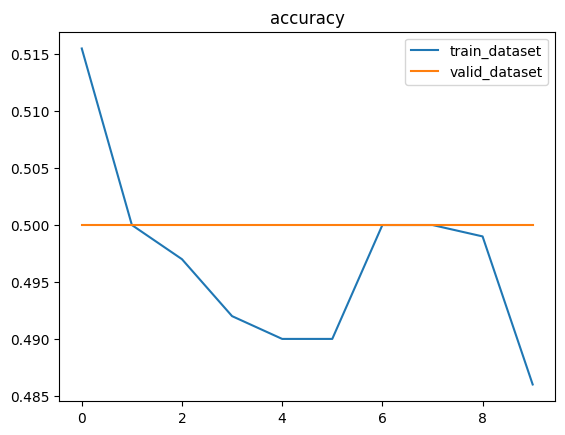

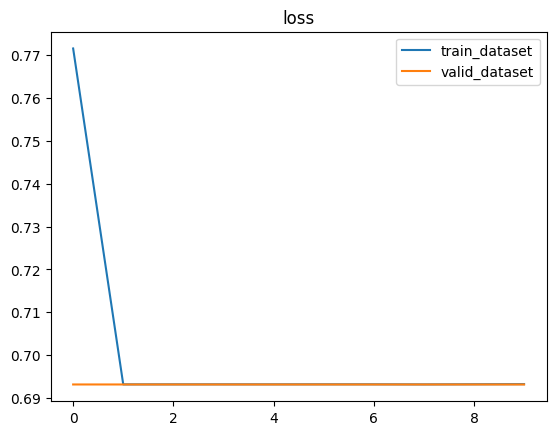

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train_dataset")
plt.plot(epochs, val_accuracy, label="valid_dataset")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train_dataset")
plt.plot(epochs, val_loss, label="valid_dataset")
plt.legend()
plt.title('loss')


1/1 [==============================] - 0s 186ms/step


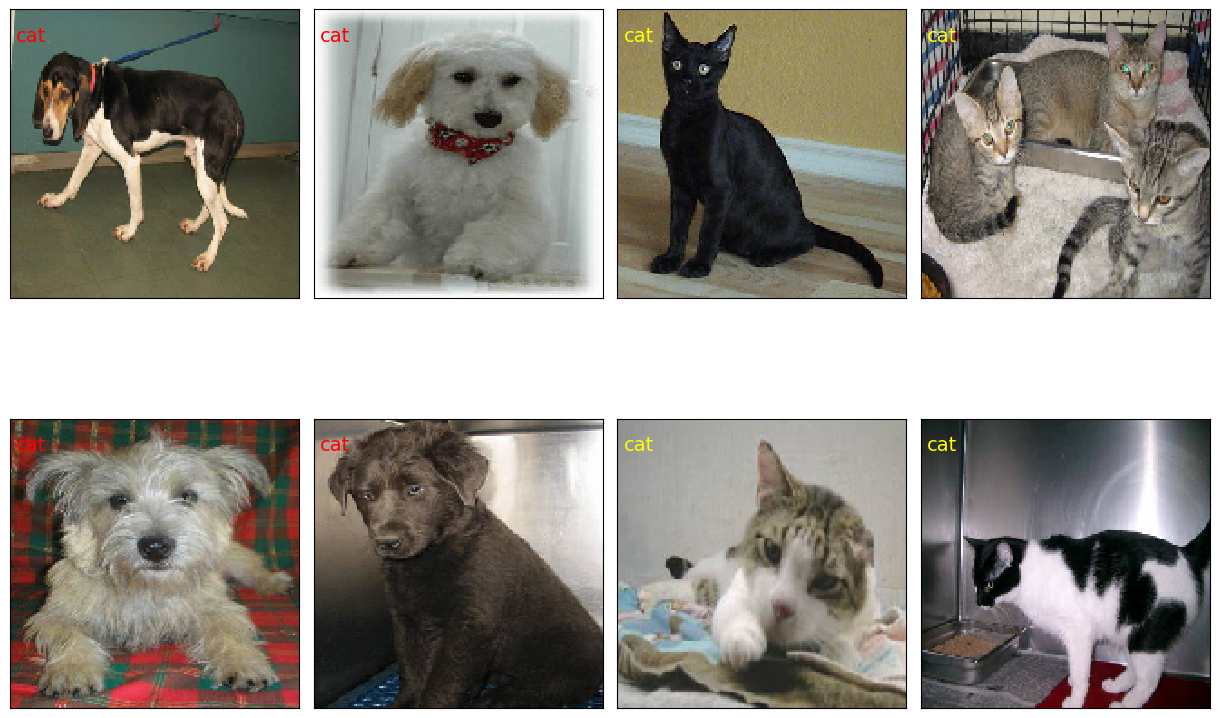

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
